In [20]:
#Submitted by Aviral Nigam 240906004
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("pokemon_data.xlsx", sheet_name="pokemon_data")

In [3]:
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]


In [4]:
height_outliers = detect_outliers_iqr(df['height_m'].dropna())
weight_outliers = detect_outliers_iqr(df['weight_kg'].dropna())
print("Q1 - Height Outliers:\n", df[df['height_m'].isin(height_outliers)][['english_name', 'height_m']])
print("Q1 - Weight Outliers:\n", df[df['weight_kg'].isin(weight_outliers)][['english_name', 'weight_kg']])


Q1 - Height Outliers:
     english_name  height_m
23         Arbok       3.5
94          Onix       8.8
129     Gyarados       6.5
147    Dragonair       4.0
207      Steelix       9.2
248        Lugia       5.2
249        Ho-Oh       3.8
320      Wailord      14.5
349      Milotic       6.2
381       Kyogre       4.5
382      Groudon       3.5
383     Rayquaza       7.0
482       Dialga       5.4
483       Palkia       4.2
485    Regigigas       3.7
486     Giratina       4.5
492       Arceus       3.2
496    Serperior       3.3
642     Reshiram       3.2
716      Yveltal       5.8
717      Zygarde       5.0
780     Dhelmise       3.9
790     Solgaleo       3.4
791       Lunala       4.0
795    Xurkitree       3.8
796   Celesteela       9.2
798     Guzzlord       5.5
803    Naganadel       3.6
804    Stakataka       5.5
843   Sandaconda       3.8
889    Eternatus      20.0
Q1 - Weight Outliers:
     english_name  weight_kg
58      Arcanine      155.0
75         Golem      300.0
94    

In [5]:
# Q2. Remove hp outliers and compute average HP by generation
hp_clean = df[['gen', 'hp']].dropna()
hp_outliers = detect_outliers_iqr(hp_clean['hp'])
hp_no_outliers = hp_clean[~hp_clean['hp'].isin(hp_outliers)]
print("Q2 - Avg HP before:", hp_clean.groupby('gen')['hp'].mean())
print("Q2 - Avg HP after:", hp_no_outliers.groupby('gen')['hp'].mean())


Q2 - Avg HP before: gen
I       64.211921
II      70.980000
III     65.666667
IV      73.102804
V       70.314103
VI      68.916667
VII     71.011364
VIII    71.112360
Name: hp, dtype: float64
Q2 - Avg HP after: gen
I       60.863014
II      67.887755
III     63.615385
IV      71.028846
V       69.703226
VI      67.285714
VII     66.869048
VIII    68.839080
Name: hp, dtype: float64


In [6]:

# Q3. Z-score for attack
df['attack_zscore'] = zscore(df['attack'].dropna(), nan_policy='omit')
print("Q3 - Top 5 attack outliers:\n", df[['english_name', 'attack', 'attack_zscore']].sort_values(by='attack_zscore', ascending=False).head(5))


Q3 - Top 5 attack outliers:
     english_name  attack  attack_zscore
797      Kartana     181       3.523064
408    Rampardos     165       2.983418
485    Regigigas     160       2.814778
288      Slaking     160       2.814778
383     Rayquaza     150       2.477499


In [7]:
# Q4. Avg attack by primary_type
print("Q4 - Avg Attack by Type:\n", df.groupby('primary_type')['attack'].mean().sort_values(ascending=False))



Q4 - Avg Attack by Type:
 primary_type
fighting    99.944444
dragon      98.806452
ground      92.657143
steel       88.566667
rock        87.120000
dark        84.361111
fire        83.741379
electric    73.897959
normal      73.862385
ice         73.071429
poison      73.028571
grass       72.767442
flying      71.571429
water       71.195122
ghost       69.483871
bug         66.253333
psychic     63.534483
fairy       63.238095
Name: attack, dtype: float64


In [8]:
# Q5. Avg HP by generation
print("Q5 - Avg HP by Gen:\n", df.groupby('gen')['hp'].mean())

Q5 - Avg HP by Gen:
 gen
I       64.211921
II      70.980000
III     65.666667
IV      73.102804
V       70.314103
VI      68.916667
VII     71.011364
VIII    71.112360
Name: hp, dtype: float64


In [9]:
# Q6. Count Pokémon with secondary_type
print("Q6 - # with secondary_type:", df['secondary_type'].notna().sum())



Q6 - # with secondary_type: 469


In [10]:
# Q7. Most frequent secondary types with Water as primary type
print("Q7 - Common secondary types with primary = Water:\n", df[df['primary_type'] == 'water']['secondary_type'].value_counts().head(5))



Q7 - Common secondary types with primary = Water:
 secondary_type
ground     9
flying     7
psychic    5
rock       5
dark       4
Name: count, dtype: int64


In [11]:
# Q8. Avg total stat of Legendary, Sublegendary, Mythical
df['total'] = df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].sum(axis=1)
legendary_groups = df.groupby(['is_legendary', 'is_sublegendary', 'is_mythical'])['total'].mean()
print("Q8 - Avg Total Stat:\n", legendary_groups)


Q8 - Avg Total Stat:
 is_legendary  is_sublegendary  is_mythical
0             0                0              405.692497
                               1              584.000000
              1                0              570.644444
1             0                0              632.000000
Name: total, dtype: float64


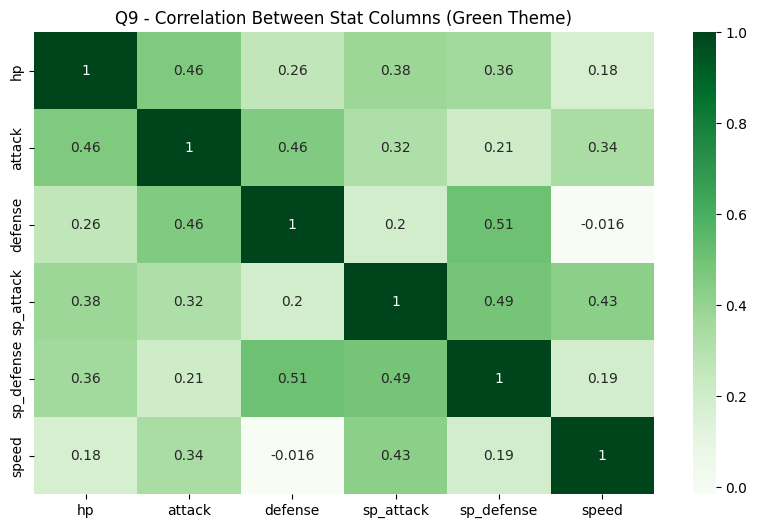

In [23]:
#correlation heat map
plt.figure(figsize=(10, 6))
sns.heatmap(df[stat_cols].corr(), annot=True, cmap='Greens')
plt.title("Q9 - Correlation Between Stat Columns (Green Theme)")
plt.show()


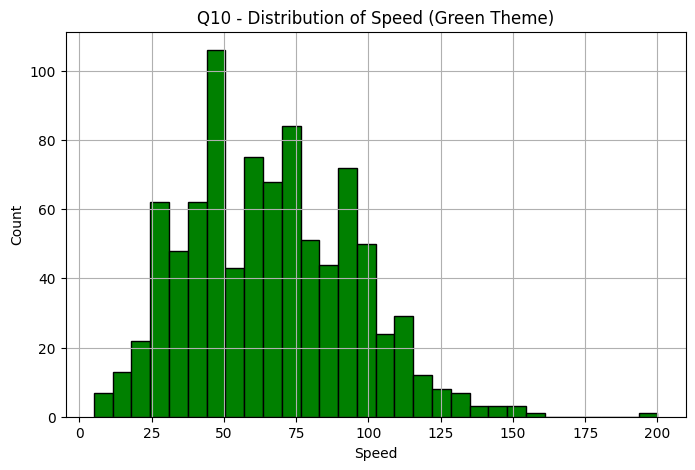

In [24]:
# Q10. Histogram of speed
plt.figure(figsize=(8, 5))
plt.hist(df['speed'].dropna(), bins=30, color='green', edgecolor='black')
plt.title("Q10 - Distribution of Speed (Green Theme)")
plt.xlabel("Speed")
plt.ylabel("Count")
plt.grid(True)
plt.show()



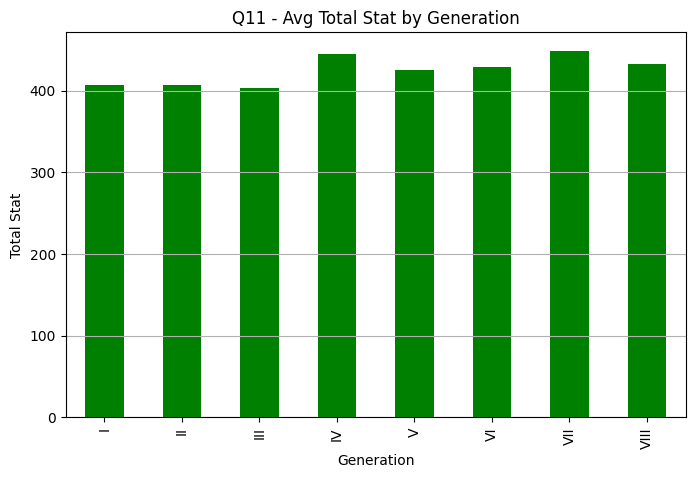

In [25]:
df['total'] = df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].sum(axis=1)
avg_total_by_gen = df.groupby('gen')['total'].mean()

plt.figure(figsize=(8, 5))
avg_total_by_gen.plot(kind='bar', color='green', title='Q11 - Avg Total Stat by Generation')
plt.ylabel('Total Stat')
plt.xlabel('Generation')
plt.grid(axis='y')
plt.show()



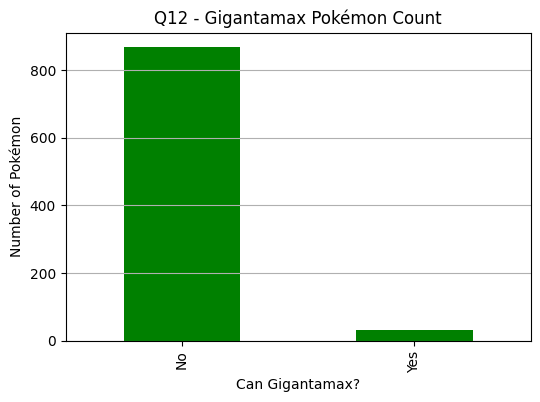

In [26]:
gigantamax_counts = df['gigantamax'].notna().value_counts()
gigantamax_counts.index = ['No', 'Yes']

plt.figure(figsize=(6, 4))
gigantamax_counts.plot(kind='bar', color='green', title='Q12 - Gigantamax Pokémon Count')
plt.ylabel('Number of Pokémon')
plt.xlabel('Can Gigantamax?')
plt.grid(axis='y')
plt.show()



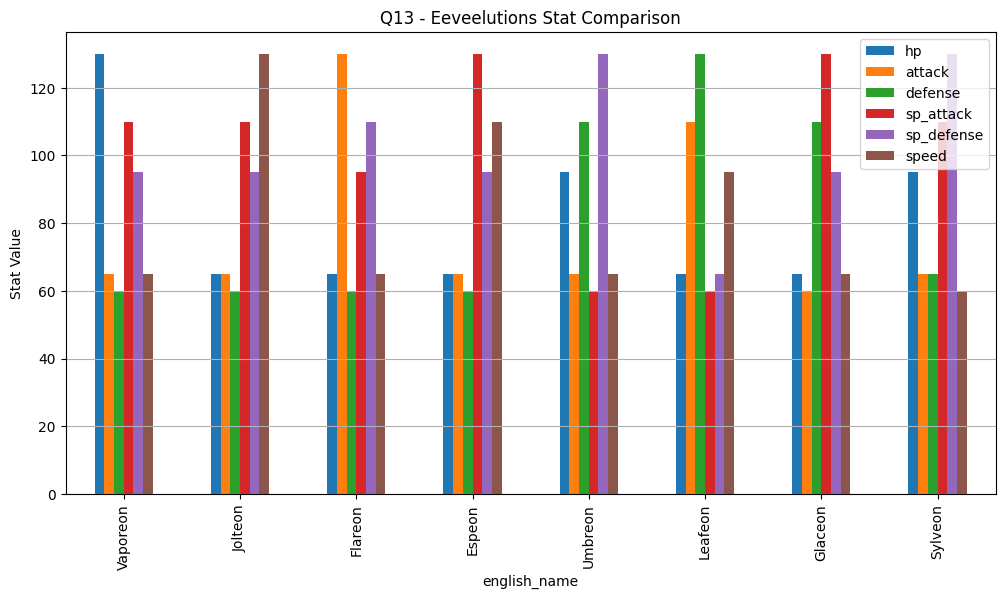

In [17]:
# Q13. Compare Eeveelutions
eeveelutions = ['Vaporeon', 'Jolteon', 'Flareon', 'Espeon', 'Umbreon', 'Leafeon', 'Glaceon', 'Sylveon']
df_eevee = df[df['english_name'].isin(eeveelutions)]
df_eevee.set_index('english_name')[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].plot(kind='bar', figsize=(12, 6))
plt.title("Q13 - Eeveelutions Stat Comparison")
plt.ylabel("Stat Value")
plt.grid(axis='y')
plt.show()



In [18]:
# Q14. Placeholder for "Season 2 Episode 4" — not enough info
print("Q14 - Not enough data or context to compare Season 2 Episode 4.")


Q14 - Not enough data or context to compare Season 2 Episode 4.


In [21]:
# Q15. Pokethon Winner (just for fun, highest total stat wins)
pokethon_winner = df.sort_values(by='speed', ascending=False).iloc[0]
print("Q15 - Pokethon Winner:\n", pokethon_winner[['english_name', 'total']])


Q15 - Pokethon Winner:
 english_name    Regieleki
total                 580
Name: 893, dtype: object
